# Introduction to XGBoost



In [1]:
### Importing important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Import sklearn libraries

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
## importing dataset

train = pd.read_csv("Data/Classification_Train.csv")

In [3]:
### As we are dealing with boolean output either 0 or 1, we will subset the dataset for have these 2 kind of outputs only.
### We won't do it in real world and try to implement any other ML method which can deal with multi-classifiers 

train = train[train['price_range'].isin([0,1])]
train.shape

(1000, 21)

In [4]:
### Let's split the data into X and y

X = train.iloc[:,:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0


In [5]:
### Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train.shape

(700, 20)

In [6]:
#Xgboost 
print(xgb.XGBClassifier())

# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [7]:
### Let's build model using the default parameters

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
y_pred = xgb_clf.predict(X_test)

In [9]:
## Checking accuracy
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [10]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[150   6]
 [  6 138]]


In [11]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.96      0.96      0.96       144

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



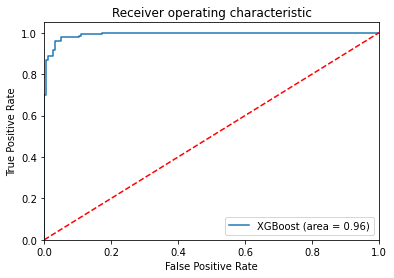

In [12]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, xgb_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

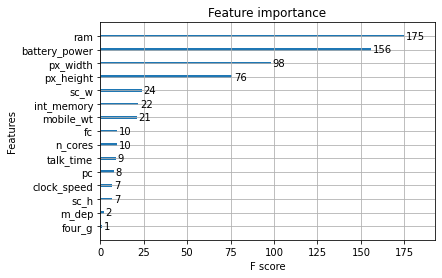

In [13]:
### Feature importance

from xgboost import plot_importance
from matplotlib import pyplot as plt

# plot feature importance
plot_importance(xgb_clf) 
plt.rcParams["figure.figsize"] = (5,15)
plt.show()

In this method, we can see XGboost performed the best among all methods. It is giving an accuracy of 96% but the feature imporance remains same as RF. 

### Let's attempt for GridSearch to imporve the model

In [15]:
from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier()

paratermers = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [5,10,20],
    'learning_rate' : [0.1, 0.5, 1, 10, 100]
}

xgb_clf_cv = GridSearchCV(xgb_clf, paratermers, cv=5)
xgb_clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 1, 10, 100],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [100, 500, 1000]},


In [16]:
### Printing best predictor

xgb_clf_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
### Prediction and Checking accuracy

model = xgb_clf_cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb_clf_cv.score(X_test, y_test)))

Accuracy of XGBoost classifier on test set: 0.96


In [19]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[152   4]
 [  7 137]]


In [20]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.97      0.95      0.96       144

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



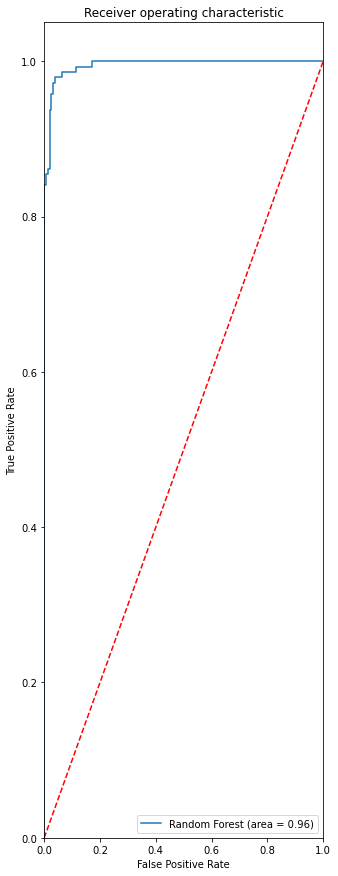

In [21]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, xgb_clf_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion

We see that the GridSearch slightly imporves the accuracy. 